In [2]:
from langchain.chat_models import init_chat_model
from langgraph.graph import StateGraph, START, END
from langgraph.graph import MessagesState
from langgraph.types import interrupt, Command
from langgraph.checkpoint.memory import InMemorySaver
from tqdm import tqdm
from IPython.display import Image, display

In [3]:
class MyState(MessagesState):
    direction: str

In [4]:
def starting(state: MyState) -> MyState:
    print("Starting here....")
    return state

def go_left(state: MyState) -> MyState:
    print("Going Left")
    print("State : ", state)
    return state

def go_right(state: MyState) -> MyState:
    print("Going Right")
    print("State : ", state)
    return state

In [5]:
def which_direction(state: MyState):
    print("which_direction....")
    direction = interrupt("Which way to go [right/left] ? ")  # Dynamic interrupt

    if direction == "left":
        return Command(goto="left", update={"direction": "left"})
    else:
        return Command(goto="right", update={"direction": "right"})

In [6]:
builder = StateGraph(MyState)
builder.add_node("starting", starting)
builder.add_node("which_direction", which_direction)
builder.add_node("left", go_left)
builder.add_node("right", go_right)

builder.add_edge(START, "starting")
builder.add_edge("starting", "which_direction")
builder.add_edge("left", END)
builder.add_edge("right", END)

In [7]:
checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

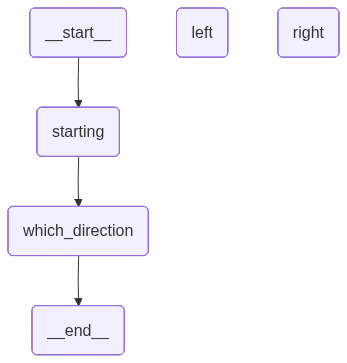

In [8]:
# Draw graph
display(Image(graph.get_graph().draw_mermaid_png()))

In [9]:
config = {"configurable": {"thread_id": 1}}

result = graph.invoke({}, config=config)
print(result)

Starting here....
which_direction....
{'messages': [], '__interrupt__': [Interrupt(value='Which way to go [right/left] ? ', id='3bd0a8234add7945d7118584001084d5')]}


In [10]:
if '__interrupt__' in result:
    question = result['__interrupt__'][0].value  # Prompt for interrupt 
    direction = input(question)
    # Resume graph execution with the given direction
    graph.invoke(Command(resume=direction), config=config)

which_direction....
Going Right
State :  {'messages': [], 'direction': 'right'}
